Возьмем модель уровень-тренд-сезон для экспоненциальных средних - модель Хольта-Винтерса (Holt-Winters)

![Holt-Winters](1_04.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose 

In [4]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.01.csv", decimal=',')
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


Рассчитаем модель Хольта-Винтерса

In [10]:
data["HW"] = ExponentialSmoothing(data["Цена"],
                                  seasonal_periods=12).fit(smoothing_level=1,
                                                           smoothing_trend=0,
                                                          smoothing_seasonal=0).fittedfcast[:-1]

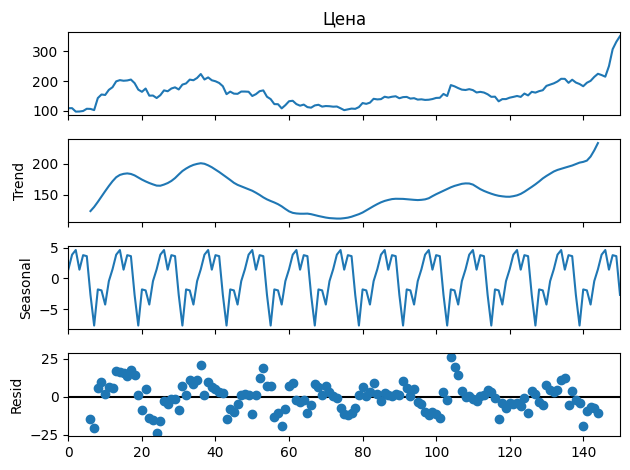

In [11]:
decompose_result = seasonal_decompose(data["Цена"], period=12)
decompose_result.plot();

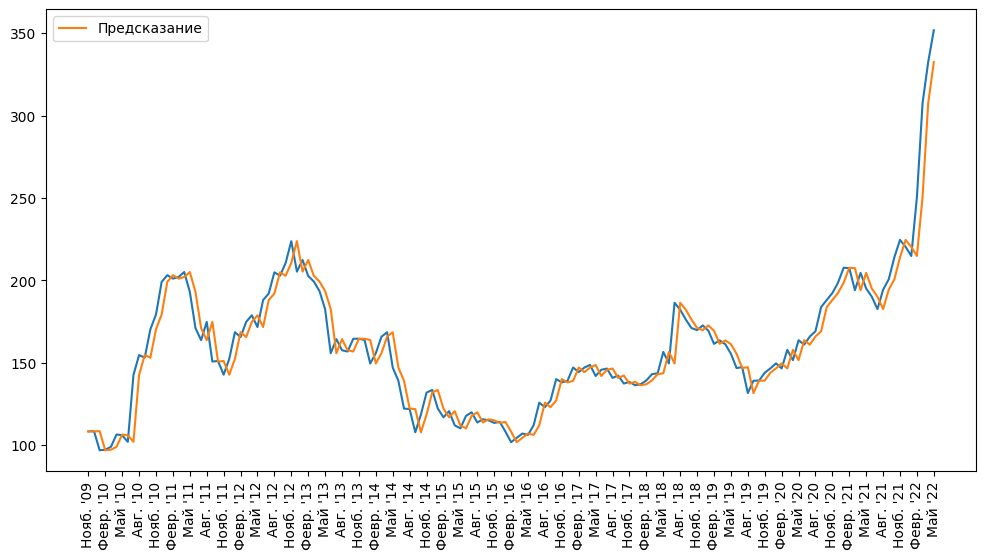

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values,data["Цена"].values)
plt.plot(data["HW"], label="Предсказание")
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

Вычислим среднеквадратичную ошибку

In [13]:
print ("MSE:", round((data[12:].apply(lambda row: (row['Цена'] - row['HW'])**2, axis=1).sum()/(len(data)-12))**(0.5),2))

MSE: 11.03


: 